# Development KNN algorithm in Python

## Data Science Academy - Machine Learning (Excercise - Chapter 6)

##### This exercise was proposed by the Data Science Academy in the Machine Learning course https://www.datascienceacademy.com.br

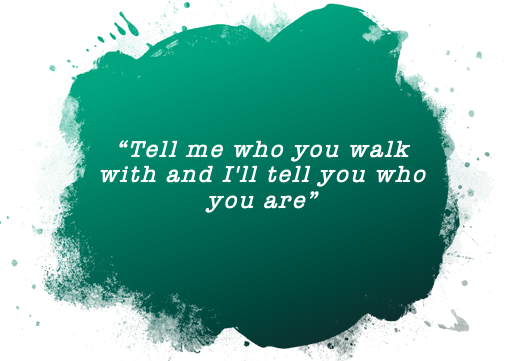

In [29]:
from IPython.display import Image
Image('photo.png')

The K-Nearest Neighbors algorithm (or KNN) is one of the simplest classification algorithm and it is one of the most used learning algorithms. Based on these facts, it is already possible to realize how interesting this algorithm is.

### But how does it works?

Just to give you a brief idea, KNN is based on feature similarity, in other words, how closely out-of-sample features resemble the training set determines how it classifies a new data point. The similarity is measured by the distances between the new data point and the k nearest neighbors.

### k nearest neighbors?

Yes! Neighbors are the points which are close to the point that has to be classified. And by that, any given data point is classified by a majority vote of its neighbors, with the point being assigned to the class most common among its k nearest neighbors. 

### Let's talk in Python now

For those who want to understand a little bit deeper about KNN algorithm, the following cells presents one of the possibilities of developing the algorithm in Python programming language. This exercise was proposed by the Data Science Academy (DSA) in the Machine Learning course.

Just to be clear, there are frameworks for this algorithm, here is presented one of the possibilies to develop it and so, to have a better understanding about KNN.


### So lets get to work!

The problem to be solved here, is the classification of plants in 3 categories. In the dataset provided, each plant has 4 predictor variables which represents the plant characteristics and the last variable represents the class. The KNN algorithm must predict the class of a new plant once the 4 characteristics are provided.

Part of the code was already provided by DSA and the development of KNN algorithm is in the space indicated by "Write solution here" in the cells below.

In [30]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from statistics import *
from scipy import stats as s

In [31]:
# Loading the dataset
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'classe']
iris_data = pd.read_csv('dados/iris.data', names = names)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris_data.shape

(150, 5)

In [33]:
# Instantiating the predictor variables and target variable
X = iris_data.iloc[:,:4].values
y = iris_data.iloc[:,4]

# Labels for target variable
target_class = pd.get_dummies(iris_data['classe']).columns
target_names = np.array(target_class)

In [34]:
# Converting classes to corresponding numeric values
y = y.replace(target_names[0], 0)
y = y.replace(target_names[1], 1)
y = y.replace(target_names[2], 2)
y = np.array(y)

In [35]:
# Separating data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 33)
print(X_train.shape, y_train.shape)

(105, 4) (105,)


In [36]:
# Function to calculate Euclidean distance
def euclidian_distance(att1, att2):
    dist = 0
    for i in range(len(att1)):
        dist += pow((att1[i] - att2[i]),2)
    return np.sqrt(dist)

### KNN Algorithm 

In [37]:
def KNN(array, k):
    # Write solution here

    # Empty list to compute the predictions for each new data point:
    predictions = []
    
    # Computing the distances between each new data point and the points of the training dataset:
    for i in range(len(array)):
        
    # Empty list to compute the distances and the corresponding label: 
        distances_label = []
        for j in range(len(X_train)):
            dis = euclidian_distance(array[i], X_train[j])
            distances_label.append([dis, y_train[j]])

        # Sorting the distances in ascending order for having the shortest ones first:
        distances_label.sort()
        # Empty list to compute the corresponding labels related to the shortest distances:
        labels = []
        for l in range(k):
            labels.append(distances_label[k][1])

        # Voting:
        result = int(s.mode(labels)[0])
        
        # Adding the resulting label of the new data point under analysis:
        predictions.append(result)
        
    return predictions  

### Model Evaluation

In [38]:
y_test_pred = KNN(X_test, 5)
y_test_prediction = np.asarray(y_test_pred)

### Accuracy

In [39]:
# As we have the observed values for the predictions we made, we can compare them and see how accurate the model is:
acc = y_test - y_test_prediction
err = np.count_nonzero(acc)
accuracy = ((len(y_test) - err) / len(y_test)) * 100
print("The achieved accuracy is: {}%".format(round(accuracy,2)))

The achieved accuracy is: 91.11%
